# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | benghazi
Processing Record 2 of Set 1 | kone
Processing Record 3 of Set 1 | manado
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | galesong
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | luau
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | callao
Processing Record 15 of Set 1 | tangalle
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | udachny
Processing Record 18 of Set 1 | vilyuchinsk
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | kapa'a
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | margaret river
Processing Record 23 of Set 1 | bredas

Processing Record 36 of Set 4 | ihosy
Processing Record 37 of Set 4 | thompson
Processing Record 38 of Set 4 | narasannapeta
Processing Record 39 of Set 4 | peniche
Processing Record 40 of Set 4 | canta
Processing Record 41 of Set 4 | kiunga
Processing Record 42 of Set 4 | ulsteinvik
Processing Record 43 of Set 4 | khandyga
Processing Record 44 of Set 4 | sao gabriel da cachoeira
Processing Record 45 of Set 4 | tenenkou
Processing Record 46 of Set 4 | segou
Processing Record 47 of Set 4 | tokar
Processing Record 48 of Set 4 | afaahiti
Processing Record 49 of Set 4 | aqadyr
Processing Record 0 of Set 5 | spasskoye
Processing Record 1 of Set 5 | gazli
Processing Record 2 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 3 of Set 5 | newman
Processing Record 4 of Set 5 | salem
Processing Record 5 of Set 5 | gadzhiyevo
Processing Record 6 of Set 5 | fisterra
Processing Record 7 of Set 5 | tsiombe
Processing Record 8 of Set 5 | kegen
Processing Record 9 of Set 5 | augusto cor

Processing Record 27 of Set 8 | bondoukou
Processing Record 28 of Set 8 | saint-leu
Processing Record 29 of Set 8 | maudaha
Processing Record 30 of Set 8 | pitimbu
Processing Record 31 of Set 8 | mao
Processing Record 32 of Set 8 | mount pearl
Processing Record 33 of Set 8 | oranjemund
Processing Record 34 of Set 8 | hammerfest
Processing Record 35 of Set 8 | opuwo
Processing Record 36 of Set 8 | rawlins
Processing Record 37 of Set 8 | maumere
Processing Record 38 of Set 8 | hakkari
Processing Record 39 of Set 8 | banda aceh
Processing Record 40 of Set 8 | ulladulla
Processing Record 41 of Set 8 | kushiro
Processing Record 42 of Set 8 | yershov
Processing Record 43 of Set 8 | motueka
Processing Record 44 of Set 8 | lompoc
Processing Record 45 of Set 8 | victorica
Processing Record 46 of Set 8 | camiri
Processing Record 47 of Set 8 | hastings
Processing Record 48 of Set 8 | murun-kuren
Processing Record 49 of Set 8 | santa elena de uairen
Processing Record 0 of Set 9 | manakara
Processi

Processing Record 18 of Set 12 | khanty-mansiysk
Processing Record 19 of Set 12 | vanimo
Processing Record 20 of Set 12 | al fuwayliq
Processing Record 21 of Set 12 | kataragama
City not found. Skipping...
Processing Record 22 of Set 12 | kirakira
Processing Record 23 of Set 12 | tandag
Processing Record 24 of Set 12 | charlestown
Processing Record 25 of Set 12 | colonia
Processing Record 26 of Set 12 | sinan
Processing Record 27 of Set 12 | monrovia
Processing Record 28 of Set 12 | puerto deseado
Processing Record 29 of Set 12 | chilmari
Processing Record 30 of Set 12 | velikiy ustyug
Processing Record 31 of Set 12 | alcala de xivert
Processing Record 32 of Set 12 | dolores
Processing Record 33 of Set 12 | plastun
Processing Record 34 of Set 12 | littlefield
Processing Record 35 of Set 12 | qa'en
Processing Record 36 of Set 12 | zheleznogorsk-ilimskiy
Processing Record 37 of Set 12 | saudarkrokur
Processing Record 38 of Set 12 | tralee
Processing Record 39 of Set 12 | kilindoni
Proces

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,benghazi,32.1167,20.0667,22.76,72,3,1.74,LY,1698449236
1,kone,-21.0595,164.8658,27.18,62,91,3.93,NC,1698449237
2,manado,1.4870,124.8455,26.43,78,20,1.03,ID,1698449238
3,puerto natales,-51.7236,-72.4875,3.12,70,44,7.08,CL,1698449239
4,galesong,-5.3166,119.3661,24.01,48,59,1.48,ID,1698449240


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,benghazi,32.1167,20.0667,22.76,72,3,1.74,LY,1698449236
1,kone,-21.0595,164.8658,27.18,62,91,3.93,NC,1698449237
2,manado,1.4870,124.8455,26.43,78,20,1.03,ID,1698449238
3,puerto natales,-51.7236,-72.4875,3.12,70,44,7.08,CL,1698449239
4,galesong,-5.3166,119.3661,24.01,48,59,1.48,ID,1698449240


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

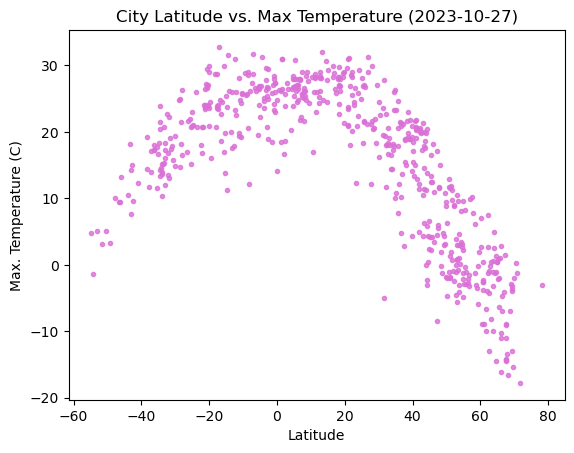

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color="orchid",
    linewidths=1,
    marker=".",  
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({str(time.strftime('%Y-%m-%d'))})")  
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

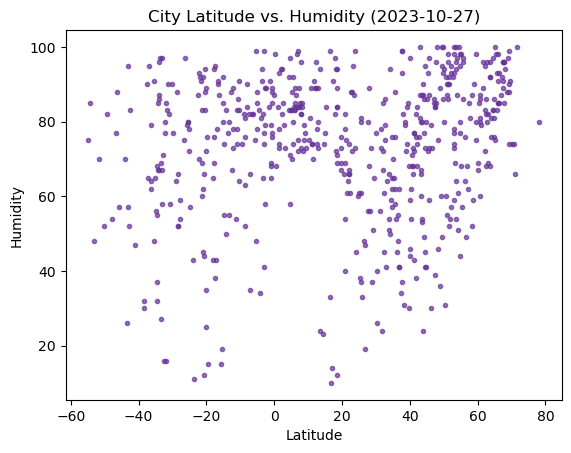

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color="rebeccapurple",
    linewidths=1,
    marker=".",  
    alpha=0.7,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({str(time.strftime('%Y-%m-%d'))})") 
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

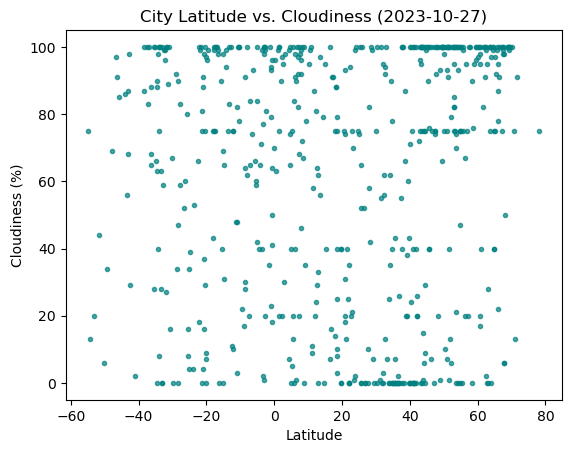

In [36]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color="teal",
    linewidths=1,
    marker=".",  
    alpha=0.7,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({str(time.strftime('%Y-%m-%d'))})") 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

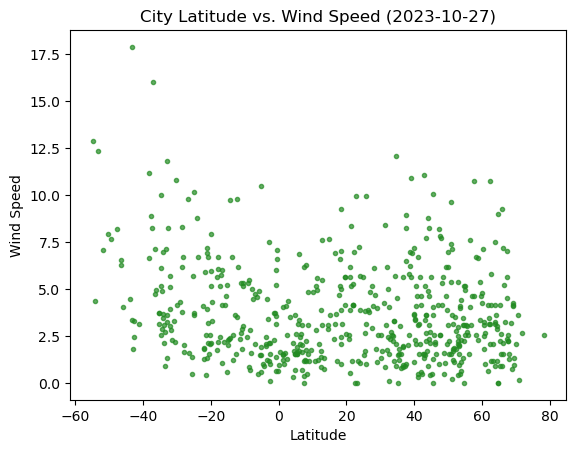

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color="forestgreen",
    linewidths=1,
    marker=".",  
    alpha=0.7,
    label="Cities"
)
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({str(time.strftime('%Y-%m-%d'))})") 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_values, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="black")
    plt.xlabel("Latitude")
    plt.ylabel("Variable")
    print(f"The r-value is {rvalue ** 2}")
    plt.show()
                          

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,benghazi,32.1167,20.0667,22.76,72,3,1.74,LY,1698449236
2,manado,1.4870,124.8455,26.43,78,20,1.03,ID,1698449238
5,iqaluit,63.7506,-68.5145,-3.15,68,75,4.12,CA,1698449241
6,olonkinbyen,70.9221,-8.7187,-1.20,66,13,0.18,SJ,1698449242
11,bilibino,68.0546,166.4372,-16.61,94,50,1.26,RU,1698449246


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kone,-21.0595,164.8658,27.18,62,91,3.93,NC,1698449237
3,puerto natales,-51.7236,-72.4875,3.12,70,44,7.08,CL,1698449239
4,galesong,-5.3166,119.3661,24.01,48,59,1.48,ID,1698449240
7,port-aux-francais,-49.3500,70.2167,3.24,82,34,7.66,TF,1698449242
8,luau,-10.7073,22.2247,19.30,86,100,1.79,AO,1698449243


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.762148350573484


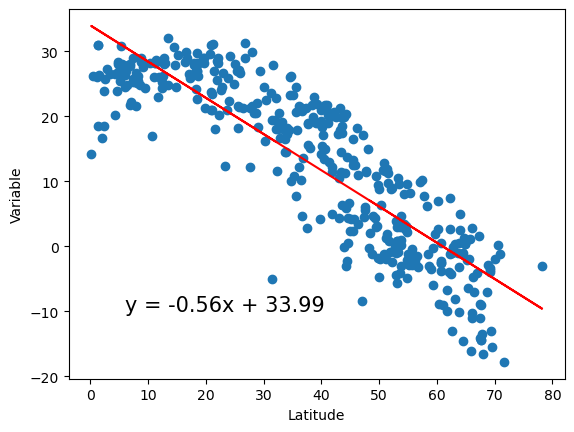

In [51]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))

The r-value is 0.5766644186153286


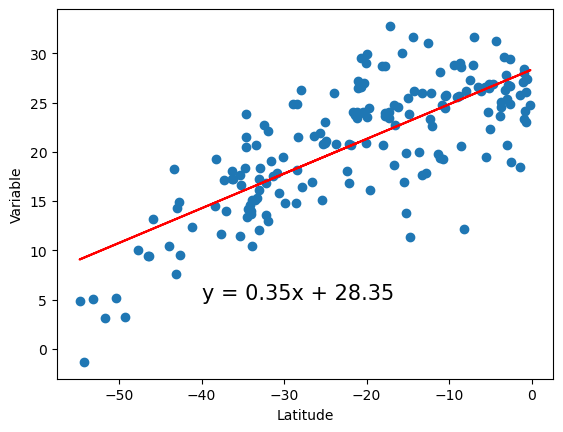

In [85]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-40,5))

**Discussion about the linear relationship:** The Northern and Southern Hemispheres experience different patterns of temperature variation. In the Northern Hemisphere, temperatures generally decrease as you move towards higher latitudes. This is supported by the negative slope of -0.56 in the linear equation, indicating a negative relationship between latitude and maximum temperature. In contrast, in the Southern Hemisphere, temperatures generally increase as latitude increases. The positive slope of +0.35 in the equation suggests a positive linear relationship between latitude and maximum temperature in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.01714038371088794


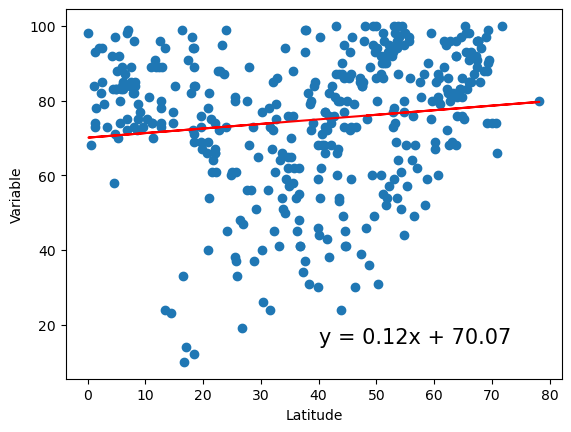

In [86]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (40,15))

The r-value is 0.034079765078704756


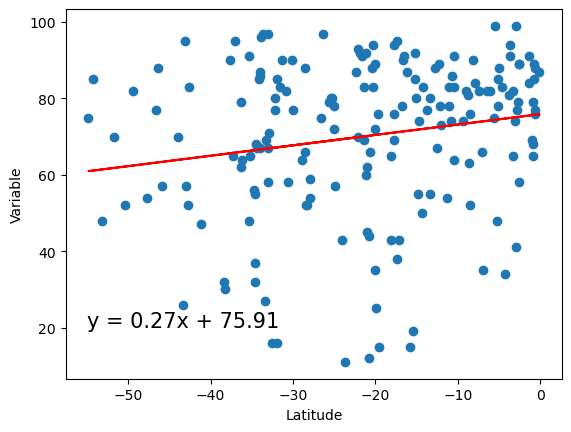

In [79]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55,20))

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, there is a positive linear relationship between latitude and humidity. As you move towards higher latitudes in either hemisphere, humidity levels tend to increase.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.035596885149215295


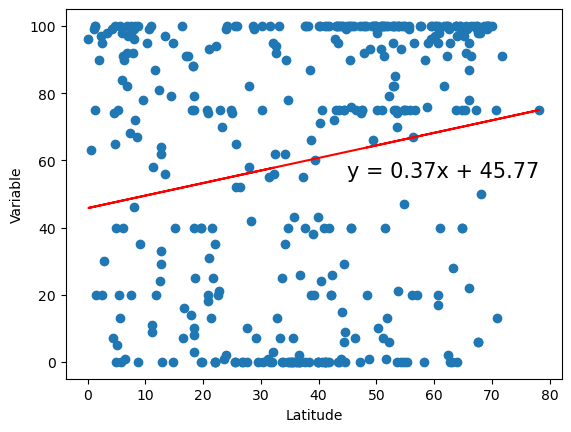

In [84]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (45,55))

The r-value is 0.0013766350468679945


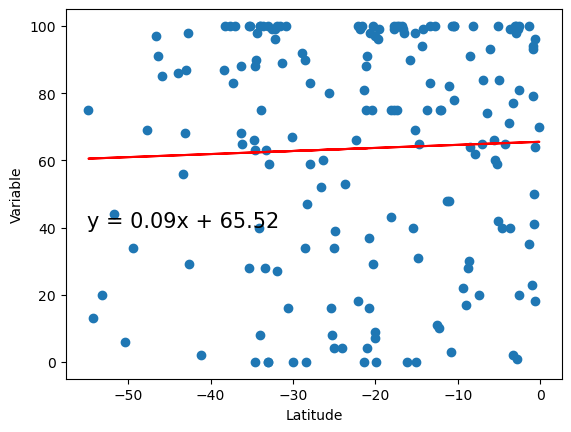

In [90]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55,40))

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, there is a positive linear relationship between latitude and cloudiness. As you move towards higher latitudes in either hemisphere, cloudiness levels tend to increase.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.003807092095839832


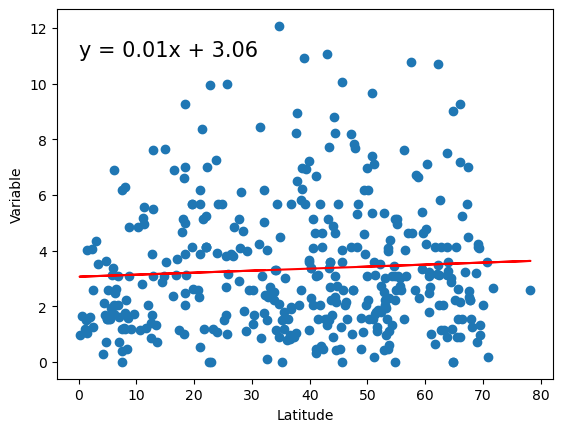

In [95]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (0,11))

The r-value is 0.1532335212729966


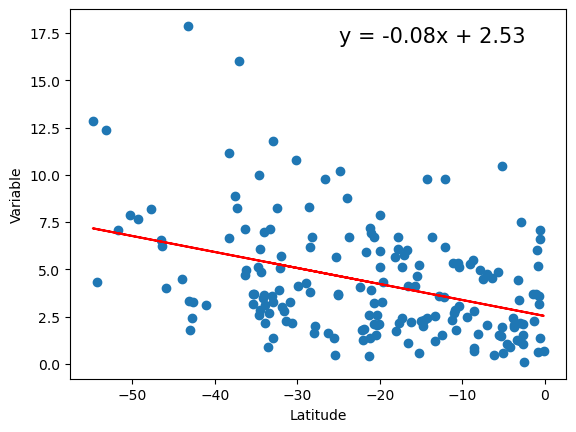

In [99]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-25,17))

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, there is a relatively weak linear relationship between latitude and wind speed. The direction of the relationship is opposite in the two hemispheres, but the slopes are quite small, indicating that latitude has only a modest impact on wind speed. 